In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *
from plots import *
import datetime
import pandas as pd
from proj1_helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [3]:
tX.shape, y.shape

((5000, 30), (5000,))

[ 1  6 11 16]
[ 2  7 12 17]
[ 3  8 13 18]
[ 4  9 14 19]


array([[     1,      1,      1,      1,      1,      2,      4,      8,
            16,     32,      3,      9,     27,     81,    243,      4,
            16,     64,    256,   1024],
       [    11,    121,   1331,  14641, 161051,     12,    144,   1728,
         20736, 248832,     13,    169,   2197,  28561, 371293,     14,
           196,   2744,  38416, 537824]])

In [16]:
y=y.reshape(len(y),1)
y.shape

NameError: name 'y' is not defined

In [17]:
tX.shape

NameError: name 'tX' is not defined

In [41]:
df= pd.read_csv(DATA_TRAIN_PATH)

In the following code section, we choose how do we deal with the datas. This part is extremly important since the method we choose is going to change the predictions. We have roughly two methods to deal with outliers, we tried both and we are going to compare them.

The method function returns the matrix we are going to work with. If argument 1 is chosen, we will use the first method and with argument 2 the second method.

### First method
We remove all columns containing -999. using remove_outlier_columns function.

In [5]:
new_tX, new_mean, new_std = method(1,tX)
new_tX.shape

(5000, 20)

### Second method
We transform all the -999. values by the mean of the columns (calculated without counting the -999.)

In [7]:
mean_tX, mean_mean, mean__std = method(2,tX)
mean_tX

(5000, 31)

For each method 1 and 2, we will implement the 6 ML methods asked in the step 2 of the project description and will compare them.

### Third method
NOT REALLY A METHOD

In [20]:
dup_tX, dup_mean, dup_std= method(3, tX)

# Linear regression
### with gradient descent method

We define the parameters of the algorithm

In [46]:
max_iters = 501
gamma = 0.04
initial_w1 = np.zeros((new_tX.shape[1], 1))
initial_w2 = np.zeros((mean_tX.shape[1], 1))

Method 1: We remove outliers

In [47]:
start_time = datetime.datetime.now()
best_ws1= least_square_GD(y, new_tX, initial_w1, gamma,max_iters)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/500): loss=0.5
Gradient Descent(100/500): loss=0.34664069018483407
Gradient Descent(200/500): loss=0.3420824627689666
Gradient Descent(300/500): loss=0.34050984134672735
Gradient Descent(400/500): loss=0.33992347569151465
Gradient Descent(500/500): loss=0.33969186313755456
Gradient Descent(500/500): loss=0.33969186313755456
Gradient Descent: execution time=0.118 seconds


Method 2: We change outliers with mean values

In [25]:
start_time = datetime.datetime.now()
best_ws2 = least_square_GD(y, mean_tX, initial_w2, gamma,max_iters)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/500): loss=0.5
Gradient Descent(100/500): loss=0.3338048617023286
Gradient Descent(200/500): loss=0.32988750586239085
Gradient Descent(300/500): loss=0.3285278951623448
Gradient Descent(400/500): loss=0.3279773616673182
Gradient Descent(500/500): loss=0.32773906243490547
Gradient Descent(500/500): loss=0.32773906243490547
Gradient Descent: execution time=0.139 seconds


### with stochastique gradient descent

In [48]:
# Define the parameters of the algorithm.
max_iters = 20
batch_size=1
initial_w1 = np.zeros((new_tX.shape[1], 1))
initial_w2 = np.zeros((mean_tX.shape[1], 1))

# For the moment we use this gamma
gamma = 0.0004



Method 1

In [49]:
# Start SGD.
start_time = datetime.datetime.now()
sgd_w  = least_square_SGD(y, new_tX, batch_size, initial_w1, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/19): loss=0.35454138073108254
Gradient Descent(1/19): loss=0.34746141185945406
Gradient Descent(2/19): loss=0.34601422585469543
Gradient Descent(3/19): loss=0.343174057582193
Gradient Descent(4/19): loss=0.3412942895889536
Gradient Descent(5/19): loss=0.3407655225616057
Gradient Descent(6/19): loss=0.3412638363506763
Gradient Descent(7/19): loss=0.34026442060698203
Gradient Descent(8/19): loss=0.3405007138156668
Gradient Descent(9/19): loss=0.3415988468801482
Gradient Descent(10/19): loss=0.3399852358182284
Gradient Descent(11/19): loss=0.33988533710758645
Gradient Descent(12/19): loss=0.3410429245095035
Gradient Descent(13/19): loss=0.3404951512950036
Gradient Descent(14/19): loss=0.3398336721938985
Gradient Descent(15/19): loss=0.3400048710088549
Gradient Descent(16/19): loss=0.34051243015980315
Gradient Descent(17/19): loss=0.3401482080258788
Gradient Descent(18/19): loss=0.33968552294991317
Gradient Descent(19/19): loss=0.33964194827710653
SGD: execution time=13.

Method 2

In [52]:
# Start SGD.
start_time = datetime.datetime.now()
sgd_w  = least_square_SGD(y, mean_tX, batch_size, initial_w2, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/19): loss=0.34085971589926223
Gradient Descent(1/19): loss=0.3350013018771247
Gradient Descent(2/19): loss=0.3321408023910517
Gradient Descent(3/19): loss=0.33099992255097743
Gradient Descent(4/19): loss=0.32953658916885986
Gradient Descent(5/19): loss=0.3294512663193073
Gradient Descent(6/19): loss=0.3293298240931374
Gradient Descent(7/19): loss=0.32987734264426916
Gradient Descent(8/19): loss=0.3284619362539957
Gradient Descent(9/19): loss=0.3282628908599057
Gradient Descent(10/19): loss=0.3280413818463362
Gradient Descent(11/19): loss=0.32795637076590595
Gradient Descent(12/19): loss=0.329012977199711
Gradient Descent(13/19): loss=0.3286025477892035
Gradient Descent(14/19): loss=0.328812564267026
Gradient Descent(15/19): loss=0.32973505213115495
Gradient Descent(16/19): loss=0.3286750286576354
Gradient Descent(17/19): loss=0.32788719463320715
Gradient Descent(18/19): loss=0.3284178196926754
Gradient Descent(19/19): loss=0.32853248314739786
SGD: execution time=16.1

# Least square method

Method 1

In [54]:
ls_weight1, ls_mse1= least_squares(y,new_tX)
print(ls_weight1.shape)
print(ls_mse1)

(20, 1)
0.339347093912


Method 2

In [55]:
ls_weight2, ls_mse2= least_squares(y,mean_tX)
print(ls_weight2.shape)
print(ls_mse2)

(31, 1)
0.327358937889


# Ridge Regression

In [45]:
lambda_= 0.0001
w, RR_mse = ridge_regression(y, mean_tX, lambda_)
w.shape, RR_mse

((31, 1), 0.34041072124984656)

# Logistic Regression
### with gradient descent method

ONLY FOR LOGISTIC REGRESSION:
y take only 1 and 0 values

In [67]:
for i in range(len(y)):
    if y[i]==-1:
        y[i]=0

We define some parameters.

In [68]:
max_iters = 500
threshold = 1e-8
alpha = 0.000001

initial_w = np.zeros((dup_tX.shape[1], 1))


We call logistic regression with gradient descent --> with true argument 

In [ ]:
l,w = logistic_regression(y, dup_tX, initial_w, alpha, max_iters, threshold, True)

### with newton's method

We call logistic regression with newton method --> with false argument 

In [23]:
l,w = logistic_regression(y, new_tX, initial_w, alpha, max_iters, threshold, False)

Current iteration=0, the loss=173286.79513998624
Current iteration=100, the loss=173279.42150918
Current iteration=200, the loss=173272.04935281907
Current iteration=300, the loss=173264.6786704757
Current iteration=400, the loss=173257.30946171956
The loss=173250.01539618877


# Penalized Logistic Regression
### with gradient descent

In [7]:
y[y==-1] = 0

Define some parameters

In [28]:
max_iter = 1001
alpha = 0.00001
lambda_ = 0.0001
threshold = 1e-8
initial_w = np.zeros((mean_tX.shape[1], 1))

In [29]:
reg_l, reg_w = reg_logistic_regression(y, mean_tX, initial_w, lambda_, alpha, max_iter, threshold)

Current iteration=0, the loss=173286.79513998624
Current iteration=200, the loss=133631.0763195679
Current iteration=400, the loss=133436.3640461938
Current iteration=600, the loss=133406.76442975178
Current iteration=800, the loss=133395.04579226096
Current iteration=1000, the loss=133389.93836580194
The loss=133389.93836580194


# Cross Validation
## Ploting on vairious lambda

In [13]:
reshape_y=y[:,0]

In [16]:
reshape_y.shape

(250000,)

(2, 125000)
(250000, 1)
(250000, 20)
lambda = 1e-08
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.09039234993
The loss=62381.09039234993
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62525.99408549989
The loss=62525.99408549989
lambda = 3.35981828628e-08
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.09039249199
The loss=62381.09039249199
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62525.99408564288
The loss=62525.99408564288
lambda = 1.12883789168e-07
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.090392969316
The loss=62381.090392969316
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62525.994086123355
The loss=62525.994086123355
lambda = 3.79269019073e-07
Current iteration=0, the loss=86643.39756999316
Current iteration=200, the loss=62381.09039457302
The loss=62381.

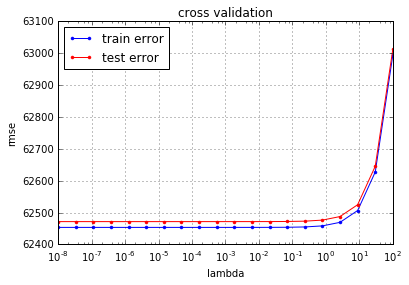

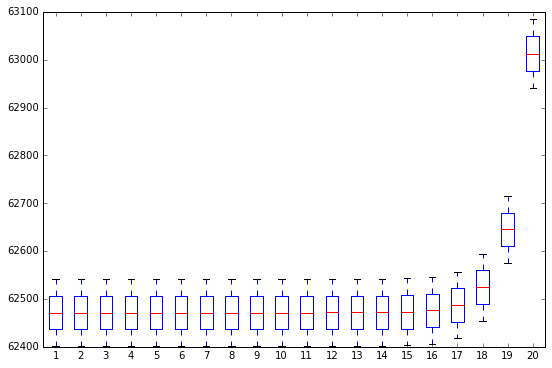

In [27]:
def cross_validation_demo(seed, initial_w, alpha, max_iter, threshold, degree,k_fold,lambdas):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    print(k_indices.shape)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    rmse_te_var=[]

    # cross validation: TODO
    print(y.shape)
    print(new_tX.shape)
    
    for lambda_ in lambdas:
        print('lambda =',lambda_)
        loss_tr, loss_te, rmses_test = cross_validation(y, mean_tX, initial_w, alpha, max_iter, threshold, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
        rmse_te_var.append(rmses_test)
    
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
     # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(rmse_te_var)

cross_validation_demo(1000, initial_w, alpha, max_iter, threshold, 1, 2, np.logspace(-8, 2, 20))

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [30]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

Pour la méthode 2:

In [31]:
mean_tX_test, mean_mean, mean__std = standardize(undefToMeanMean(tX_test), mean_x=None, std_x=None)

In [35]:
OUTPUT_PATH = 'mean_log_pen_10-4.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(reg_w, mean_tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [32]:
np.dot(mean_tX_test, reg_w)

array([[-4.20967426],
       [-2.57229167],
       [-1.42675124],
       ..., 
       [-0.25694514],
       [-0.02774611],
       [-2.87362728]])